# Weather Prediction Project 
##### Name: Krisha Vekaria

I got the weather history data set from Kaggle( https://www.kaggle.com/datasets/muthuj7/weather-dataset). It has classic column variables that are related to weather and impact the weather in some way or another. Dataset has 96453 rows and 12 columns in total. All columns are 100% valid. 

I am going to predict the Precip Type, that is, if it is going to rain or snow based on this data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = 'weatherHistory.csv'
weather_df = pd.read_csv(dataset)
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
weather_df.shape


(96453, 12)

Visualizing NaN values in Precip Type:

([<matplotlib.patches.Wedge at 0x7fabe69a41c0>,
 [Text(-1.099844043941702, 0.018522392015159376, 'Non NaN elements'),
  Text(1.3998015102643366, -0.023573965760608412, 'NaN elements')])

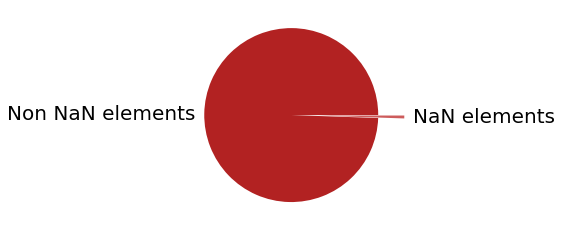

In [4]:
explodes = (0,0.3)
plt.pie(weather_df['Precip Type'].isna().value_counts(),explode=explodes,startangle=0,colors=['firebrick','indianred'],
   labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 20})

In [5]:
weather_df=weather_df.dropna()
weather_df.shape

(95936, 12)

Removed all null values from data set and printted out dimensions to compare to earlier dimensions.

In [6]:
del weather_df['Loud Cover']

As all values of Loud Cover are same that is 0 for all rows it wasn't useful part of prediction and hence I deleted the column.

### Classification of columns in Categorical and Numerical features

In [7]:
categorical_features = [column_name for column_name in weather_df.columns if weather_df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 4
Categorical Features:  ['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']


In [8]:
numerical_features = [column_name for column_name in weather_df.columns if weather_df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 7
Numerical Features:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


### Univariate analysis:

Text(0.5, 1.0, 'Count of rain and snow')

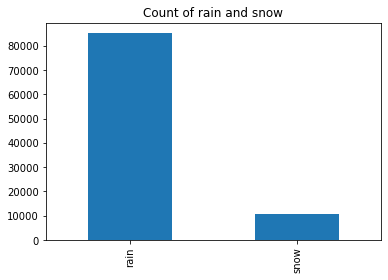

In [10]:
img = weather_df['Precip Type'].value_counts().plot(kind='bar')
img.set_title("Count of rain and snow")

The variable Precip Type is not balanced as there is more count of rain than snow.

### Bivariate Analysis

Text(0.5, 1.0, 'Humidity vs Temparature')

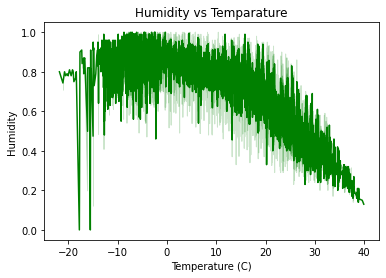

In [11]:
ax = sns.lineplot(data=weather_df,x='Temperature (C)',y='Humidity',color='green')
ax.set_title('Humidity vs Temparature')

Temperature is inversely proportional to Humidity

Text(0.5, 1.0, 'Visibility vs Temparature')

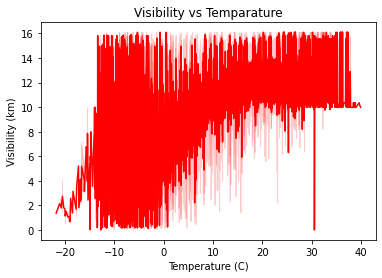

In [12]:
ax3 = sns.lineplot(data=weather_df,x='Temperature (C)',y='Visibility (km)',color='red')
ax3.set_title('Visibility vs Temparature')

Temperature is directly proportional to Visibility

### Correaltion 

I created a correlation matrix to understand how much correaltion exists between different variables. As values in the top right of matrix are mirrored image of bottom left with 1 correlation on diagonal, I just plotted bottom left of matrix.

<AxesSubplot:>

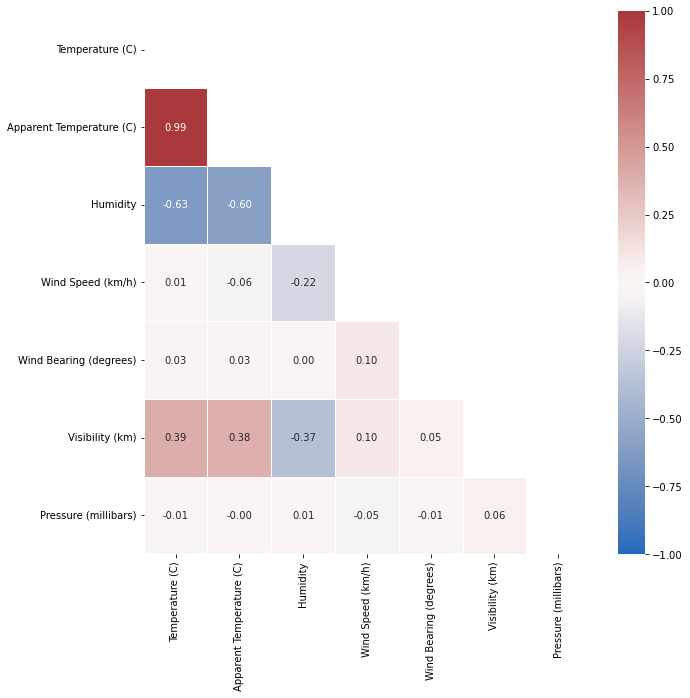

In [13]:
plt.figure(figsize=(10,10))
matrix=weather_df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, linewidths=0.5, annot=True, fmt=".2f",vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)


As Apparent Temperature and Temperature are higly correlated, one of them can be dropped.

In [14]:
weather_df.drop('Apparent Temperature (C)',axis=1,inplace=True)

### Converting categortical data to numerical data for further usage in Logistic Regression algorithm

In [15]:
def encode_data(feature_name):

    mapping_dict = {}

    unique_values = list(weather_df[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict


weather_df['Formatted Date'].replace(encode_data('Formatted Date'), inplace=True)
weather_df['Summary'].replace(encode_data('Summary'), inplace=True)
weather_df['Precip Type'].replace({'snow':0, 'rain': 1},inplace=True)
weather_df['Daily Summary'].replace(encode_data('Daily Summary'), inplace=True)



In [16]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,0,0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0
1,1,0,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0
2,2,1,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0
3,3,0,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0
4,4,1,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0


Splitting data set into independent and dependent features:

In [17]:
X=weather_df.drop(['Precip Type'],axis=1) #Independent features
y=weather_df['Precip Type'] #Dependent features

Now I will see which features are important in terms of relevance for building the model. I will also viualize the feature importance values.

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([7.87178392e-03, 4.58820349e-04, 9.18309616e-01, 5.37944689e-03,
       6.47609280e-04, 6.18773182e-04, 6.04882231e-02, 5.16126126e-03,
       1.06446645e-03])

Text(0.5, 1.0, 'Feature importance plot')

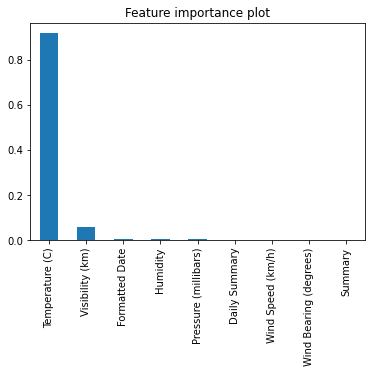

In [19]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
grph = feature_imp.nlargest(10).plot(kind='bar')
grph.set_title("Feature importance plot")

Temperature and Visibility are most relevant features for predicting target variable(Precip Type).

### Splitting the data set into testing and training sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

I will perform feature scaling on data set to standardize values of independent features. This will scale the distribution such that it is centered around 0, with a standard deviation of 1.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Predicitve Model

Now, I will use Logistic Regression to build predictive model to decide whether it will rain or snow. 

First will create a logistic regression object that takes in independent and dependent values as paramenters and fills regression object with data.

In [22]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver='liblinear', random_state=0)
logr.fit(X_train, y_train) 

LogisticRegression(random_state=0, solver='liblinear')

Next, we use logistic regression object to test the data.

In [23]:
y_pred = logr.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

Evaluating performance of model:

In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.9959349593495935


### Classification report

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2162
           1       1.00      1.00      1.00     17026

    accuracy                           1.00     19188
   macro avg       0.98      1.00      0.99     19188
weighted avg       1.00      1.00      1.00     19188



Precision shows that predidiction for snow and rain were 97% and 100% correct repsectively. Model matched 100% of positive cases based on recall. Also, f1-score shows that positive predictions for snow and rain were 98% and 100% correct respectively. Support shows actual occurences of snow and rain in specified dataset.

<font size="3">*On an average model accuracy score is 0.99. So, it does a great job of predicting whether it is going to rain or snow.*</font> 

### Confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 2162     0]
 [   78 16948]]


True positive and True negative values  sugests that precticed value matches actual value. While False positive and False negative suggests that predicted value was falsely predicted. The True positive and True negative values are 2162 and 16948 respectively. As these values are considerably larger than False positive (0) and False negative (78) values, we can double check that model is highly accurate.

### Conclusion

Overall, I cleaned the data set and dropped least relevant columns for effective analysis. I also visualized the univariate and bivaraite analysis plots along with correlation matrix and feature importance plot for easy interpretation of data. Moving on to building a predicitve model and testing accuracy by two different methods.